In [53]:
import numpy as np
import pandas as pd

In [80]:
import distribution_modules as dm
import density_estimation_modules as dem
import classification_modules as cm
import importlib

importlib.reload(dm)
importlib.reload(dem)
importlib.reload(cm)

<module 'classification_modules' from 'C:\\Users\\shfar\\Desktop\\SU\\Thesis\\thesis\\classification_modules.py'>

In [54]:
# set configurations
num_steps = 10
x = np.linspace(0,1,num_steps)

# cv config
test_size = 0.2
cv = 5
cv_config = [test_size, cv]

In [4]:
# reading data
train_data = pd.read_csv('graphwave_ac_train.csv')
test_data = pd.read_csv('graphwave_ac_test.csv')

In [5]:
kde_df = dem.get_kde(test_data, x)

In [6]:
kde_df.head()

,0,1,2,3,4,5,6,7,8,9,label
0,177.533922,6.642079e-24,5.488203e-19,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,B5_0
1,179.581589,7.264006e-48,2.806194e-14,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,B5_0
2,179.581589,7.264006e-48,2.806194e-14,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,B5_0
3,179.581589,7.264006e-48,2.806194e-14,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,B5_0
4,165.684665,3.189130e-02,5.947435e-63,5.789855e-195,0.0,0.0,0.0,0.0,0.0,0.0,B5_1


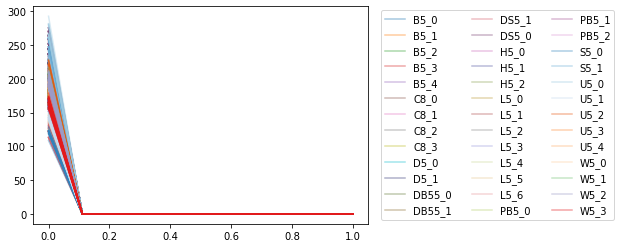

In [7]:
dem.get_kde_plot(kde_df,x)

In [13]:
num_steps_list = list(np.arange(5,300,5))

In [65]:
res_svm = cm.cv_numsteps(num_steps_list, test_data, train_data, cv_config, 1)

  0%|          | 0/59 [00:00<?, ?it/s]

In [64]:
res_lr = cm.cv_numsteps(num_steps_list, test_data, train_data, cv_config, 2)

  0%|          | 0/59 [00:00<?, ?it/s]

In [81]:
num_steps_list = list(np.arange(5,100,5))
n_estimators_list = [10, 20, 50, 100, 200]
max_depth_list = [1, 3, 5, 8]
gbm_config = [n_estimators_list, max_depth_list]
res_gbm = cm.cv_kde_gbm(num_steps_list, test_data, train_data, gbm_config, cv_config)

  0%|          | 0/5 [00:00<?, ?it/s]

In [66]:
import json
res_svm['num_steps_list'] = [int(i) for i in res_svm['num_steps_list']]
res_lr['num_steps_list'] = [int(i) for i in res_lr['num_steps_list']]

with open('results/kde/res_svm.json', 'w') as f:
    json.dump(res_svm, f)

with open('results/kde/res_lr.json', 'w') as f:
    json.dump(res_lr, f)

In [82]:
res_gbm['num_steps'] = [int(i) for i in res_gbm['num_steps']]
res_gbm['n_estimators'] = [int(i) for i in res_gbm['n_estimators']]
res_gbm['max_depth'] = [int(i) for i in res_gbm['max_depth']]

with open('results/kde/res_gbm.json', 'w') as f:
    json.dump(res_gbm, f)

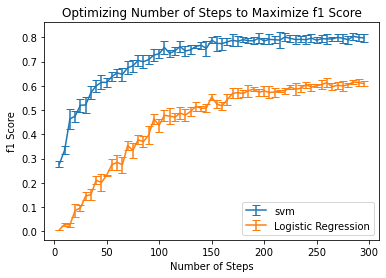

In [67]:
cm.plot_cv_kde(res_svm, res_lr, errbar=1)

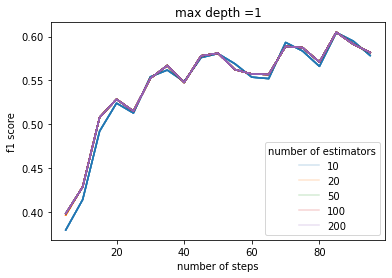

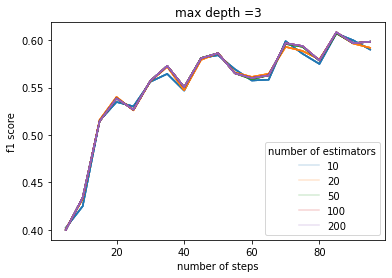

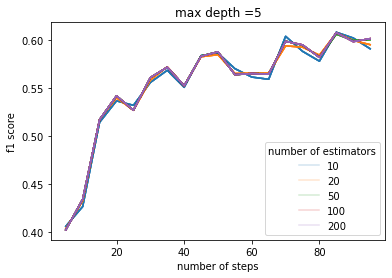

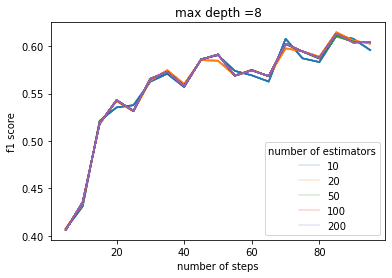

In [84]:
import matplotlib.pyplot as plt

for m in range(len(res_gbm['max_depth'])):
    fig, ax = plt.subplots()
    colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']
    handles = []
    for n, color in zip(range(len(res_gbm['n_estimators'])), colors):
        for i in range(len(res_gbm['num_steps'])):
            #hh = ax.errorbar(res_gbm['num_steps'], res_gbm['f1'][n][m], yerr= res_gbm['std'][n][m], capsize=4, label = res_gbm['n_estimators'])
            hh = plt.plot(res_gbm['num_steps'], res_gbm['f1'][n][m], alpha=0.2, label=res_gbm['n_estimators'][n], c=color)
        handles.append(hh[0] if isinstance(hh, list) else hh)
        plt.legend(handles=handles, title='number of estimators')
        plt.title('max depth =%d' %res_gbm['max_depth'][m])
        plt.xlabel('number of steps')
        plt.ylabel('f1 score')

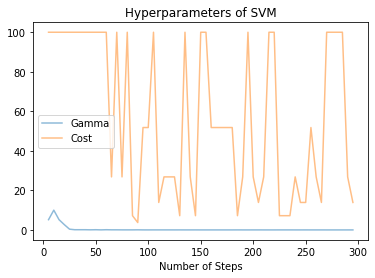

In [68]:
cm.plot_h_params_kde(res_svm)

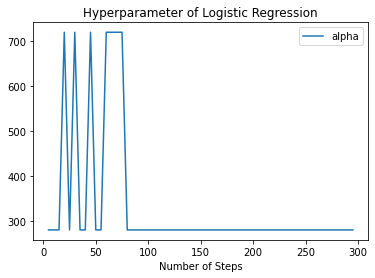

In [69]:
cm.plot_h_params_kde(res_lr)

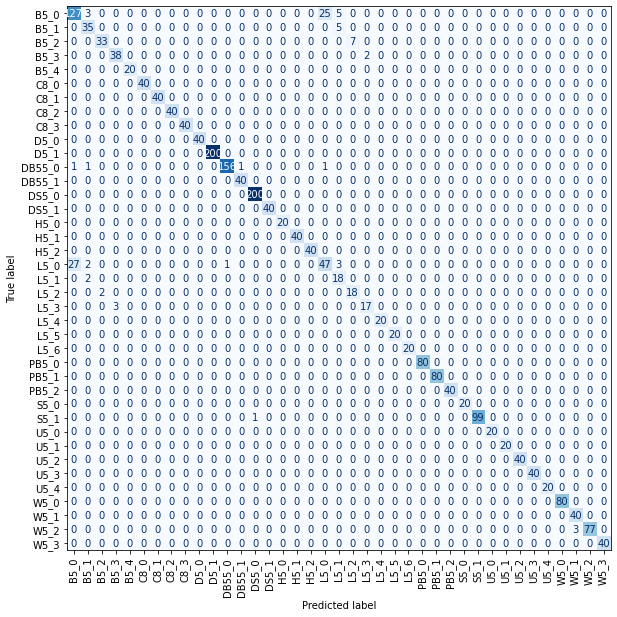

0.958183597833583

In [51]:
max_index = res_svm['f1'].index(max(res_svm['f1']))
cost = res_svm['cost'][max_index]
gamma = res_svm['gamma'][max_index]
num_steps = res_svm['num_steps_list'][max_index]
cm.svm_given_params(test_data, train_data, 2, num_steps, cost, gamma, plot=1)

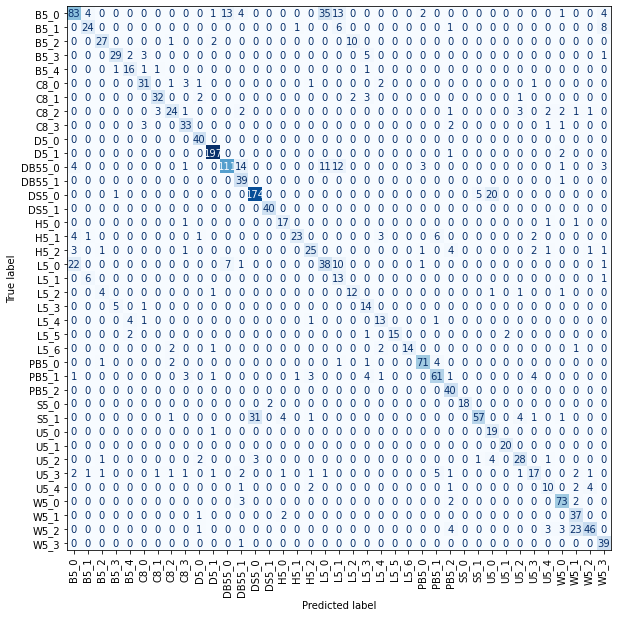

0.7323657554272334

In [52]:
max_index = res_lr['f1'].index(max(res_lr['f1']))
alpha = res_lr['alpha'][max_index]
num_steps = res_lr['num_steps_list'][max_index]
cm.lr_given_params(test_data, train_data, 2, num_steps, alpha, plot=1)

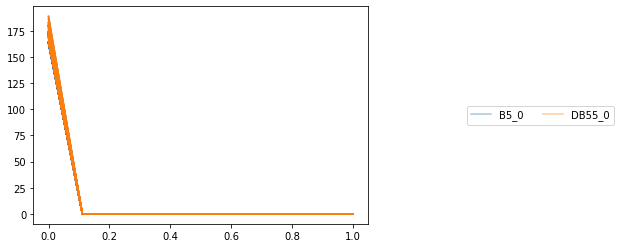

In [149]:
subset = kde_df.loc[(kde_df['label']== 'B5_0') | (kde_df['label']== 'DB55_0')]
dem.get_kde_plot(subset,x)